In [16]:
import yfinance as yf

In [17]:
# AAPL hisse senedi sembolü
symbol = "AAPL"

# Tarih aralığını belirleyin (örneğin, son 1 yıl)
start_date = "2022-01-01"
end_date = "2023-01-01"

period = "5y"
interval = "1d"

# Verileri çek
# data = yf.download(symbol, start=start_date, end=end_date)
data = yf.download(symbol, period=period, interval=interval)

[*********************100%***********************]  1 of 1 completed


In [18]:
# Veriyi göster
print(data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-11-21  44.932499  45.067501  44.137501  44.195000  42.418854  124496800
2018-11-23  43.735001  44.150002  43.025002  43.072498  41.341442   94496000
2018-11-26  43.560001  43.737499  42.564999  43.654999  41.900543  179994000
2018-11-27  42.877499  43.692501  42.720001  43.560001  41.809364  165549600
2018-11-28  44.182499  45.322498  43.732498  45.235001  43.417046  184250000


In [19]:
# Önceki gün değerlerini içeren sütunları ekleyin
data['Prev Open'] = data['Open'].shift(1)
data['Prev High'] = data['High'].shift(1)
data['Prev Low'] = data['Low'].shift(1)
data['Prev Close'] = data['Close'].shift(1)
data['Prev Volume'] = data['Volume'].shift(1)

# İlk gün için NaN değerleri temizleyin
data = data.dropna()

print(data.head(5))

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-11-23  43.735001  44.150002  43.025002  43.072498  41.341442   94496000   
2018-11-26  43.560001  43.737499  42.564999  43.654999  41.900543  179994000   
2018-11-27  42.877499  43.692501  42.720001  43.560001  41.809364  165549600   
2018-11-28  44.182499  45.322498  43.732498  45.235001  43.417046  184250000   
2018-11-29  45.665001  45.700001  44.424999  44.887501  43.083508  167080000   

            Prev Open  Prev High   Prev Low  Prev Close  Prev Volume  
Date                                                                  
2018-11-23  44.932499  45.067501  44.137501   44.195000  124496800.0  
2018-11-26  43.735001  44.150002  43.025002   43.072498   94496000.0  
2018-11-27  43.560001  43.737499  42.564999   43.654999  179994000.0  
2018-11-28  42.877499  43.692501  42.720001   43.560001  165549600.0  
2018-11-29  4

In [20]:
X = data[['Prev Open', 'Prev High', 'Prev Low', 'Prev Close', 'Prev Volume']].values

In [21]:
y = data[['Close']].values

In [22]:
# define the size of the training set
train_size = int(len(data) * 0.8)

In [23]:
# split the data into training and testing sets
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

In [24]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1004, 5)
(1004, 1)
(252, 5)
(252, 1)


In [25]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data using MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

# Eğitim ve test setlerini göster
print("Eğitim seti:", X_train.shape, y_train.shape)
print("Test seti:", X_test.shape, y_test.shape)

Eğitim seti: (1004, 5) (1004, 1)
Test seti: (252, 5) (252, 1)


In [26]:
# reshape the input data into 3D format (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [27]:
# Eğitim ve test setlerini göster
print("Eğitim seti:", X_train.shape, y_train.shape)
print("Test seti:", X_test.shape, y_test.shape)

Eğitim seti: (1004, 1, 5) (1004, 1)
Test seti: (252, 1, 5) (252, 1)


In [28]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense

# define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 100)            42400     
                                                                 
 dropout_3 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 100)            80400     
                                                                 
 dropout_4 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [30]:
# train the model
model_his = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
251/251 [==============================] - 5s 7ms/step - loss: 0.1013 - val_loss: 0.0280
Epoch 2/100
251/251 [==============================] - 1s 3ms/step - loss: 0.0421 - val_loss: 0.0334
Epoch 3/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0406 - val_loss: 0.0216
Epoch 4/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0351 - val_loss: 0.0208
Epoch 5/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0362 - val_loss: 0.0558
Epoch 6/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0369 - val_loss: 0.0259
Epoch 7/100
251/251 [==============================] - 1s 3ms/step - loss: 0.0350 - val_loss: 0.0242
Epoch 8/100
251/251 [==============================] - 1s 3ms/step - loss: 0.0346 - val_loss: 0.0601
Epoch 9/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0336 - val_loss: 0.0434
Epoch 10/100
251/251 [==============================] - 1s 4ms/step - loss: 0.0326 - val_lo

In [31]:
preds = model.predict(X_test)

In [51]:
preds = y_scaler.inverse_transform(preds)
y_test = y_scaler.inverse_transform(y_test)

In [57]:
import matplotlib.pyplot as plt
import numpy as np

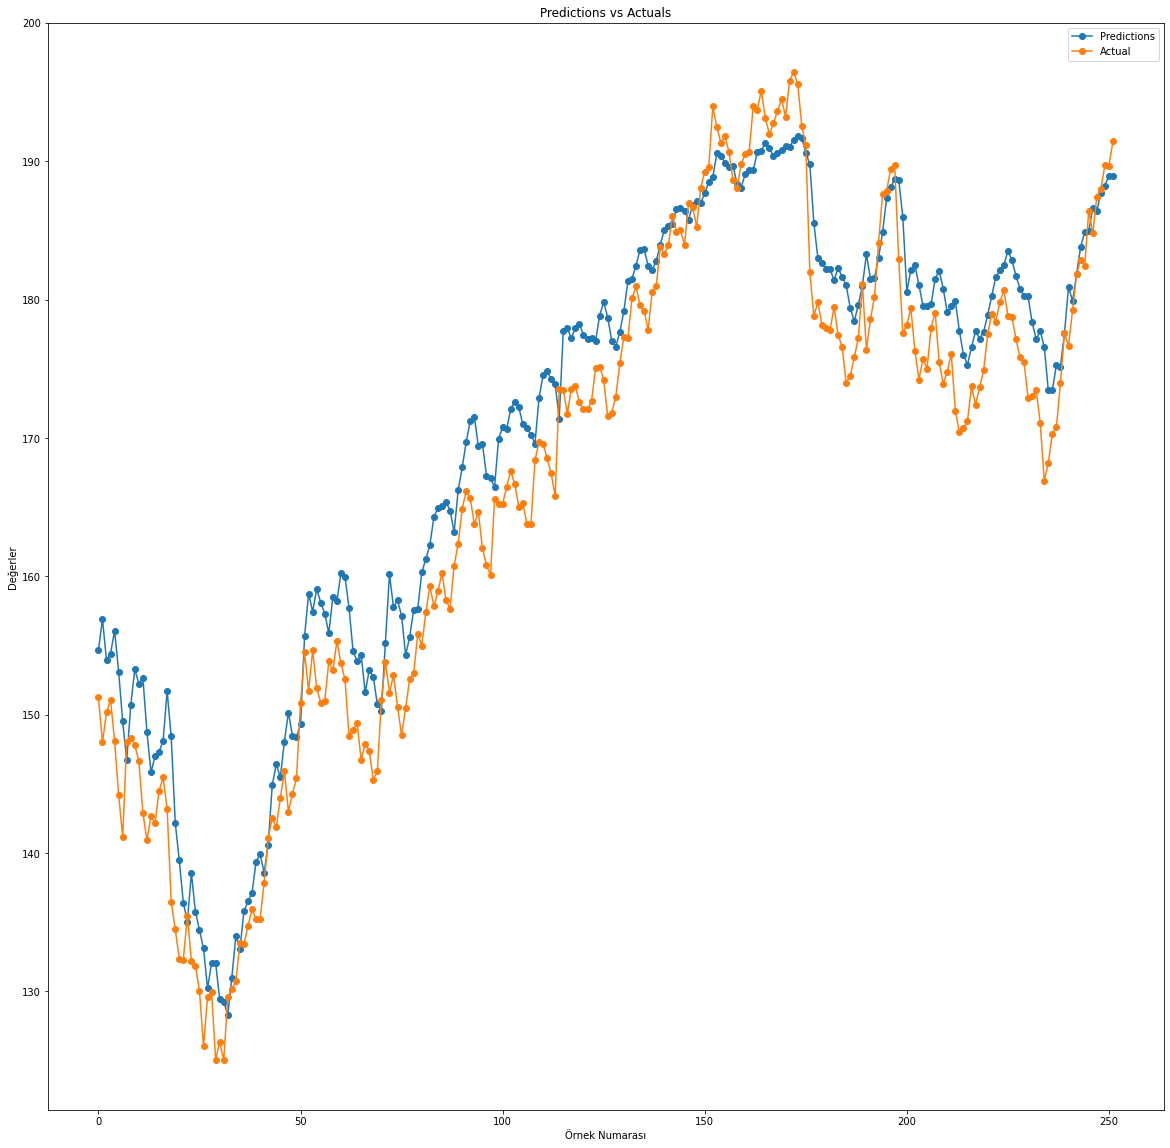

In [58]:
# X eksenindeki değerler
x_values = np.arange(len(preds))


plt.figure(figsize=(20, 20))


# Çizgi grafikleri oluştur
plt.plot(x_values, preds, label='Predictions', marker='o')
plt.plot(x_values, y_test, label='Actual', marker='o')

# Eksen etiketleri
plt.xlabel('Örnek Numarası')
plt.ylabel('Değerler')

# Başlık
plt.title('Predictions vs Actuals')

# İlgili yeri göster
plt.legend()

# Grafik göster
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE 
error = mae(preds, y_test) 
  
# display 
print("Mean absolute error : " + str(error)) 

Mean absolute error : 3.949024533468582


In [60]:
from sklearn.metrics import mean_absolute_percentage_error

error = mean_absolute_percentage_error(preds, y_test)
print("Mean absolute error : " + str(error)) 

Mean absolute error : 0.023736429019088276


In [61]:
for index, value in enumerate(preds):
    print(value, y_test[index])

[154.66312] [151.28999329]
[156.91193] [148.00999451]
[153.92714] [150.17999268]
[154.41702] [151.07000732]
[156.08002] [148.11000061]
[153.12132] [144.22000122]
[149.51817] [141.16999817]
[146.69879] [148.02999878]
[150.69745] [148.30999756]
[153.28163] [147.80999756]
[152.24152] [146.63000488]
[152.67613] [142.91000366]
[148.76494] [140.94000244]
[145.84494] [142.6499939]
[146.98311] [142.16000366]
[147.30379] [144.49000549]
[148.11484] [145.47000122]
[151.70616] [143.21000671]
[148.43106] [136.5]
[142.20964] [134.50999451]
[139.46947] [132.36999512]
[136.4177] [132.30000305]
[135.05186] [135.44999695]
[138.54338] [132.22999573]
[135.76816] [131.86000061]
[134.42635] [130.02999878]
[133.11235] [126.04000092]
[130.23705] [129.61000061]
[132.08707] [129.92999268]
[132.03923] [125.06999969]
[129.44261] [126.36000061]
[129.27284] [125.01999664]
[128.30995] [129.61999512]
[130.9936] [130.1499939]
[134.00542] [130.72999573]
[133.05168] [133.49000549]
[135.78021] [133.41000366]
[136.5169] [